In [1]:
import pandas as pd
data = pd.read_csv("data.csv")
print(data.shape)
print(data.head(5))
print()
print(data.Sentiment.value_counts())

(5842, 2)
                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


In [2]:
df = data[data['Sentiment'] != 'neutral']
print(df.Sentiment.value_counts())

Sentiment
positive    1852
negative     860
Name: count, dtype: int64


In [3]:
from textblob import TextBlob

def sentiment_textblob(text):
    # create textBlob string
    text = TextBlob(text)
    # ranges -1 to 1 whether close to -1 is negative and close to 1 is posivite sentiment and neither close to -1 and 1 is neutral
    polarity = text.sentiment.polarity
    if polarity <= 0:
        return "negative"
    else:
        return "positive"

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# create sentiment Intensity Analyzer object
vader_sia = SentimentIntensityAnalyzer()
# calculate the polarity scores of sentiment text which provides the percentage of positivity, negativity, neutral & compound
# compound range -1 to 1 and other ranges 0 to 1
def sentiment_vader(text):
    # provides dictionary with pos, neg, neu & compound key and their values
    scores = vader_sia.polarity_scores(text)
    compound = scores['compound'] * 100

    # compound more than 5% is positive, from -5% to 5% neutral and less than 5% 
    if compound > 0:
        return "positive"
    else:
        return "negative"

In [5]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
# if model doesn't initialized, the given model will taken by default
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")# Sample data

def sentiment_transformers(labels_):
    # Perform sentiment analysis
    results = sentiment_pipeline(labels_)
    labels_ = [label['label'].lower() for label in results]
    return labels_
    


/home/abdullah/environments/torch/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
df['textblob'] = df['Sentence'].apply(sentiment_textblob)
df['vader'] = df['Sentence'].apply(sentiment_vader)
df['transformers'] = sentiment_transformers(df['Sentence'].to_list())

df.head(5)

/tmp/ipykernel_4825/1078900968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['textblob'] = df['Sentence'].apply(sentiment_textblob)
/tmp/ipykernel_4825/1078900968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vader'] = df['Sentence'].apply(sentiment_vader)
/tmp/ipykernel_4825/1078900968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,Sentence,Sentiment,textblob,vader,transformers
0,The GeoSolutions technology will leverage Bene...,positive,positive,positive,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,positive,negative,negative
2,"For the last quarter of 2010 , Componenta 's n...",positive,negative,positive,negative
5,$SPY wouldn't be surprised to see a green close,positive,negative,negative,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,negative,negative,negative


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def measure_performance(y_true,y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true,y_pred)
    print("Accuracy:", accuracy)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    
    # Define class labels (optional)
    labels = ['negative', 'positive']

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust font size
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.523598820058997

Confusion Matrix:
[[ 683  177]
 [1115  737]]


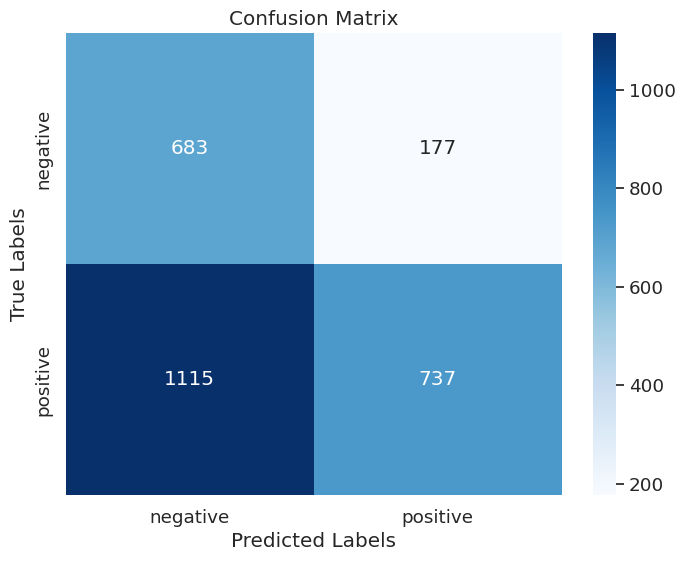

In [12]:
measure_performance(df['Sentiment'], df['textblob'])

Accuracy: 0.6268436578171092

Confusion Matrix:
[[ 550  310]
 [ 702 1150]]


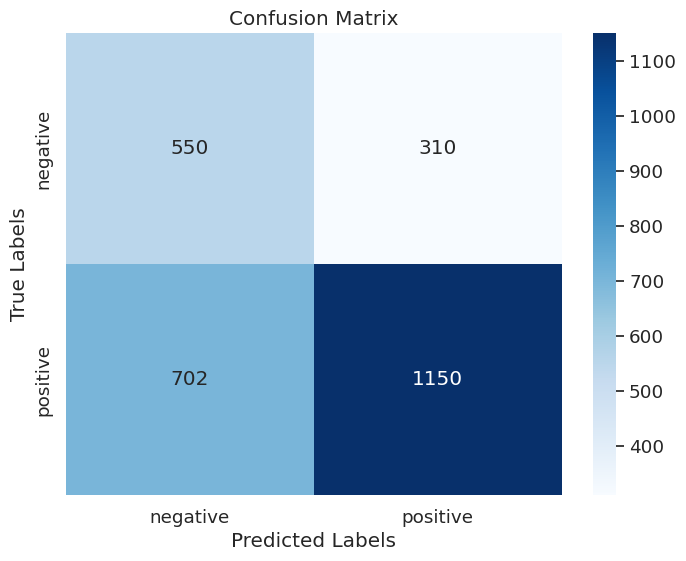

In [13]:
measure_performance(df['Sentiment'], df['vader'])

Accuracy: 0.6589233038348082

Confusion Matrix:
[[829  31]
 [894 958]]


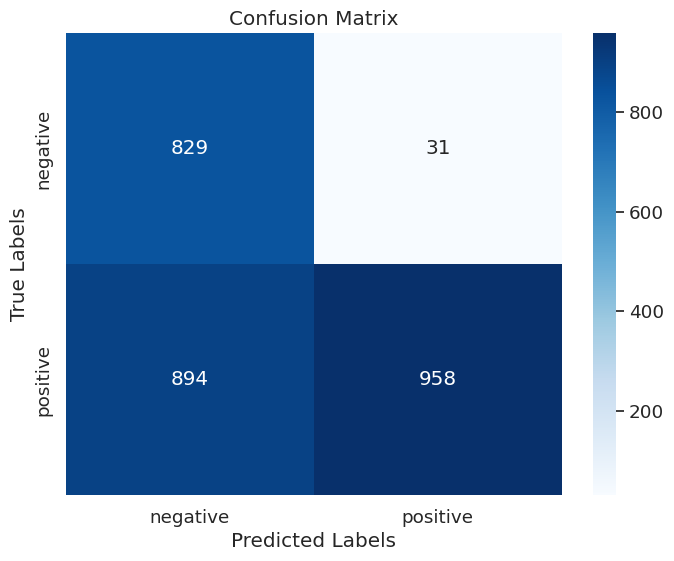

In [14]:
measure_performance(df['Sentiment'], df['transformers'])